## Imports

In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy.linalg import svd
import sklearn.cluster as cluster

np.random.seed(1234)

## 6.2 PCA Intro

### Data Load - California Housing Data Set

In [2]:
housing = datasets.fetch_california_housing()
X = pd.DataFrame(data=housing.data, columns=housing.feature_names)
X = X.head(500)
display(X)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
495,5.3794,52.0,6.861017,1.123729,1316.0,2.230508,37.86,-122.25
496,3.2619,52.0,4.792053,1.017219,1508.0,1.997351,37.85,-122.26
497,2.7054,52.0,5.001227,1.128834,1800.0,2.208589,37.85,-122.27
498,2.2431,47.0,6.371166,1.226994,719.0,2.205521,37.85,-122.27


<Axes: xlabel='HouseAge', ylabel='MedInc'>

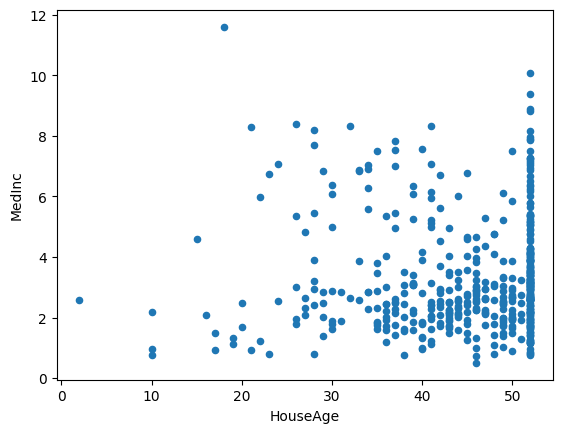

In [3]:
X.plot(kind="scatter", x="HouseAge", y="MedInc")

In [4]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000
mean,3.263727,44.566000,4.986801,1.065597,962.554000,2.704029,37.8129,-122.232580
std,1.830058,9.115692,1.237588,0.101361,563.771908,0.886751,0.0450,0.044438
min,0.499900,2.000000,1.714286,0.571429,18.000000,1.437141,37.7300,-122.340000
25%,2.019875,40.000000,4.205968,1.011633,581.250000,2.223203,37.7800,-122.270000
50%,2.723100,48.000000,4.799381,1.060227,861.500000,2.559290,37.8100,-122.240000
75%,3.928600,52.000000,5.727549,1.104526,1178.500000,3.005099,37.8500,-122.190000
max,11.601700,52.000000,8.972868,1.753333,4985.000000,12.234043,37.9000,-122.120000


### PCA = normalize and SVD

#### Normalize (Center and Scale s.t. 0 mean, unit variance)

In [5]:
mu = X.mean()
sigma = X.std()
Xnorm = (X - mu) / sigma
Xnorm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-2.842171e-17,-3.055334e-16,-7.673862e-16,1.321609e-15,2.842171e-17,2.700062e-16,2.586376e-14,-3.900880e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.510241e+00,-4.669530e+00,-2.644270e+00,-4.875320e+00,-1.675419e+00,-1.428686e+00,-1.842204e+00,-2.417327e+00
25%,-6.796793e-01,-5.008945e-01,-6.309315e-01,-5.323970e-01,-6.763444e-01,-5.422343e-01,-7.311039e-01,-8.420812e-01
50%,-2.954155e-01,3.767130e-01,-1.514403e-01,-5.298101e-02,-1.792462e-01,-1.632240e-01,-6.444381e-02,-1.669760e-01
75%,3.633069e-01,8.155168e-01,5.985418e-01,3.840648e-01,3.830379e-01,3.395194e-01,8.244363e-01,9.581993e-01
max,4.556125e+00,8.155168e-01,3.220836e+00,6.785006e+00,7.134882e+00,1.074711e+01,1.935536e+00,2.533445e+00


#### Perform the SVD

In [6]:
(U, s, Vt) = svd(Xnorm, full_matrices=False)
V = Vt.T
Sigma = np.diag(s)

#### Reconstruction via SVD

In [7]:
# Verify reconstruction of X given SVD: X = U*Sigma*Vt
XnormFromSvd_mm = U @ Sigma @ Vt
XnormFromSvd = pd.DataFrame(
    data=XnormFromSvd_mm, columns=Xnorm.columns, index=Xnorm.index
)
# display(Xnorm)
# display(XnormFromSvd - Xnorm)
np.allclose(Xnorm, XnormFromSvd)

True

## 6.3 Interpreting the PCA

### Reconstruction via Summation Over Rank-1 Matrices

Helpful: https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf

In [8]:
XnormFromSvd_prog_res = np.zeros_like(XnormFromSvd_mm)
r = len(s)  # --> rank of X
for i in range(r):
    ui = U[:, i].reshape(len(U), 1)  # ith col
    vi = Vt[i, :].reshape(1, r)  # ith row
    XnormFromSvd_prog_res += s[i] * (ui @ vi)

np.allclose(XnormFromSvd_mm, XnormFromSvd_prog_res)

True

## 6.4 PCA Analysis Continued

### Lower Dimension Projection

Xtilde_rr = Ur*Sigmar

where

Ur is first r columns U and Sigmar is upper rxr sub-matrix of Sigma

with * being matrix multiplication

In [9]:
r = 4
Xtilde_rr = pd.DataFrame(U[:, :r] @ Sigma[:r, :r])
display(Xtilde_rr)

,0,1,2,3
0,2.356638,2.561292,-0.373466,-0.081947
1,0.998427,1.926513,-3.621135,2.075675
2,2.292102,2.681337,0.752103,-0.340198
3,1.668287,0.851944,0.461972,-0.439094
4,1.575858,0.501728,0.748310,-0.144674
...,...,...,...,...
495,1.921808,0.934943,0.219431,0.555541
496,1.170219,-0.775287,-0.726074,-0.083996
497,1.019720,-1.136275,-0.107908,0.674712
498,1.253135,-0.284725,1.601242,1.145250


### Incorporate New Data

#### Make up a new row by average of 2 randomly selected rows

In [10]:
random_rows = X.sample(2, random_state=123)
new_row = random_rows.mean(axis=0).to_frame().transpose()
new_row_norm = (new_row - mu) / sigma

display(random_rows)
display(new_row)
display(new_row_norm)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
229,2.9844,50.0,5.260870,1.059783,462.0,2.510870,37.79,-122.19
337,2.2500,46.0,4.320225,1.028090,693.0,3.893258,37.74,-122.17


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.6172,48.0,4.790547,1.043936,577.5,3.202064,37.765,-122.18


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.353283,0.376713,-0.158578,-0.213698,-0.682996,0.56164,-1.064434,1.183234


#### Perform the Lower-Dimension Projection

In [11]:
new_row_norm_proj = new_row_norm @ V[:, :r]

display(new_row_norm_proj)

,0,1,2,3
0,-1.386209,0.591045,0.558818,-0.875751


#### Check the Process - Repeat on Existing Row to Verify Result

In [12]:
first_row_proj = ((X.head(1) - mu) / sigma) @ V[:, :r]
display(first_row_proj)
display(Xtilde_rr.head(1))

,0,1,2,3
0,2.356638,2.561292,-0.373466,-0.081947


,0,1,2,3
0,2.356638,2.561292,-0.373466,-0.081947


## 6.6 Clustering and K-Means

### Clustering is *unsupervised*

It creates labels where none were there before  
Binning values by pre-existing labels is not clustering per se but merely sorting (Dr. Gomes' terminology)

### Start with K-Means
Starting with K-means algo because widely employed, easy to understand, and scales well to large data sets
- The **K** in **K**-means is the number of clusters
- Centroid based
- Points assigned based on proximity to centroid of a cluster
- Choose centroids such that sum of squared distance for all points w.r.t. its assigned cluster is minimized
    - AKA minimizes "inertia" using a term from mechanics
    - Here inertia := sum of squared distances from points to their assigned centroids
- Quickly finds sub-optimal solution
    - No known algo for finding outright best
- Algorithm overview
    - Update: adjust positions of centroids
        - Recompute centroid using mean of points in that cluster
    - Assignment: classify points (i.e. assign them to clusters)
    - Guaranteed to converge, but not guaranteed to be the best
- Run multiple times (an "ensemble") with different initial conditions, then keep the best performer overall

Extrema of K
- K = 1 -> no clusters -> intertia maximized
- K = number of data points -> every point is a cluster -> inertia is zero

Choosing K
- Elbow method
    - Look at plot of intertia vs. K
    - Choose K such where the benefit flattens out
    - Also look at differential intertia (dIntertia/dK)

## 6.7 Clustering in Scikit Learn

### Helper Plot

In [13]:
def myscatter(data, assignment):
    sns.scatterplot(
        data=data,
        x="Annual Income (k$)",
        y="Spending Score (1-100)",
        hue=assignment,
        palette=sns.color_palette("Set1", as_cmap=True),
    )

### Data Load

In [14]:
data = pd.read_csv("./data/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Keep Just 2 Columns

In [15]:
data = data.set_index("CustomerID")

In [16]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


### Initial Scatter Plot

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

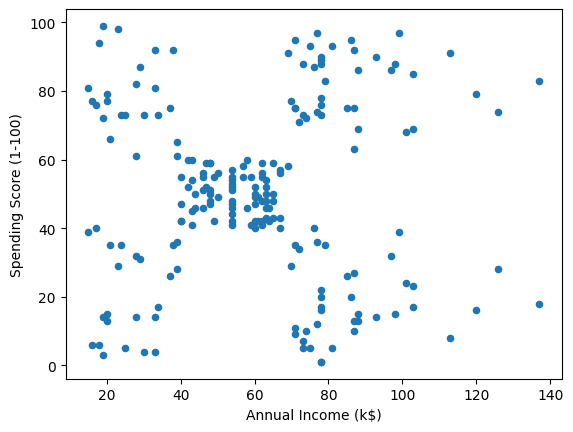

In [17]:
X.plot(kind="scatter", x="Annual Income (k$)", y="Spending Score (1-100)")

### Kmeans

In [18]:
kmeans = cluster.KMeans(n_clusters=5, init="random", random_state=42)

In [19]:
kmeans.fit(X)

KMeans(init='random', n_clusters=5, random_state=42)

In [20]:
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

#### Scatter Plot with K-Means Labels

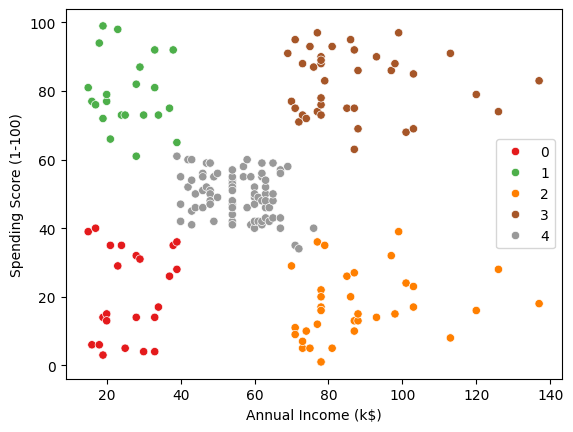

In [21]:
myscatter(X, kmeans.labels_)

#### K-Means++ - Improved Initialization

In [22]:
kmeanspp = cluster.KMeans(n_clusters=5, init="k-means++", verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 69548.0.
Iteration 1, inertia 45620.08449988457.
Iteration 2, inertia 44586.43912798357.
Iteration 3, inertia 44448.45544793371.
Converged at iteration 3: strict convergence.


#### Scatter with K-Means++ Labels

Chooses subsequent centroids based on distance from first  
Default init routine because much better than random init

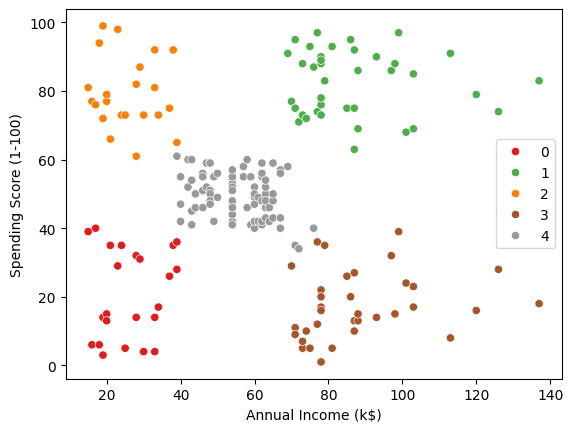

In [23]:
myscatter(X, kmeanspp.labels_)

### DBSCAN

Density based spatial clustering of applications with noise

#### Fit with DBSCAN

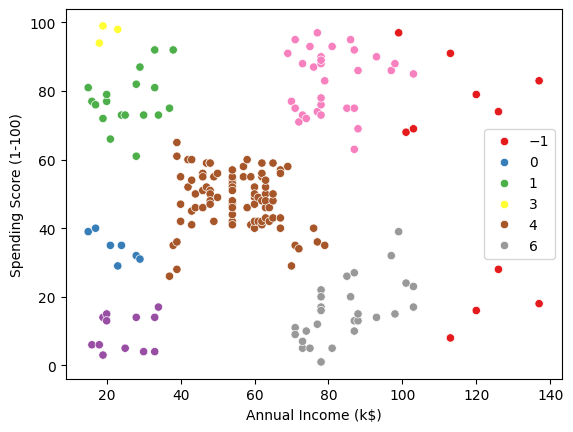

In [24]:
dbscan = cluster.DBSCAN(eps=9, min_samples=3).fit(X)
myscatter(X, dbscan.labels_)

### Prediction

New customer data - what label to apply it to?

In [25]:
Xnew = np.array([[30, 20], [80, 23]])

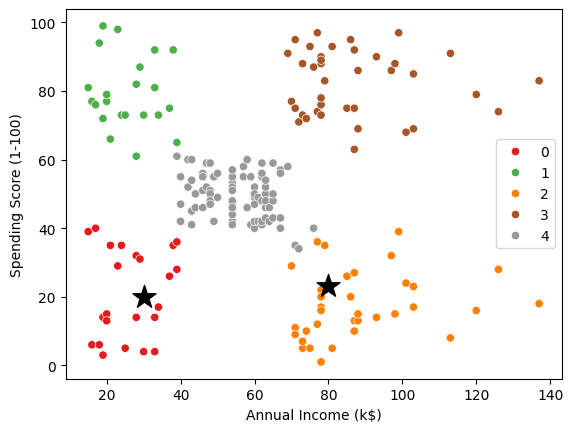

In [26]:
myscatter(X, kmeans.labels_)
plt.scatter(Xnew[:, 0], Xnew[:, 1], marker="*", s=300, color="black")

In [27]:
kmeans.predict(Xnew)

array([0, 2], dtype=int32)

#### Only kmeans can predict labels for new data, DBSCAN cannot do that

## 6.8 DBSCAN

Attributes
- Centroidless algorithm
- Does not require multiple runs to test multiple centroid placements because no centroids
- Can create curved cluster boundaries
- Has a built-in outlier rejection, so outliers will not be classified at all
    - Outliers appear as black dots in scatter plots

### How it Works

How DBSCAN works
- Takes 2 parameters, eps = radius, min samples = min number of samples (per cluster?)
- Draw a circle wih radius eps around every point
- If that circle contains at least min samples points, that point is designated a core point
- Core points that are in eps neighborhood of other core points are joined to form clusters
- Points that are not core but do have one core in its eps neighborhood are called boundary points
    - Included in cluster of its neighboring core point
- A boundary point can be a boundary of more than 1 cluster
    - If that happens it is assigned randomly to one of its options
    - Only source of randomness in dbscan
- Points that have no core or boundary points within their eps circle are outliers
    - Assigned a cluster of -1

### Section